In [1]:
#SETUP CELL (modify at your own peril)
from astropy import units #access units by doing units.<unit> (i.e. units.au)
from astropy import constants
import numpy as np #common math functions (i.e. np.sin(x)) and better arrays (i.e. np.array([1,2,3])
import matplotlib.pyplot as plt #plotting functions (i.e. plt.plot(x,y))
G = constants.G # gravitational constant
M_sun = constants.M_sun # mass of the sun
R_sun = constants.R_sun # radius of the sun
L_sun = constants.L_sun # luminosity of the sun
M_earth = constants.M_earth # mass of the earth
R_earth = constants.R_earth # radius of the earth
M_jup = constants.M_jup # mass of jupiter
R_jup = constants.R_jup # radius of jupiter
sigma_sb = constants.sigma_sb # Stefan-Boltzmann constant
b_wien = constants.b_wien # Wien's displacement constant
c = constants.c # speed of light
h = constants.h # Planck constant
k_B = constants.k_B # Boltzmann constant
m_e = constants.m_e # mass of electron
m_p = constants.m_p # mass of proton 
m_n = constants.m_n # mass of neutron (basically just the mass of a proton but whatever)
g0 = constants.g0 # standard gravity, 9.8 m/s^2
e = constants.e # absolute value of electron/proton charge

# Note

In this notebook I have placed just a single practice problem (with solution), as it was the only type of problem you didn't yet have a worked solution for. I would encourage you to review the midterm 2 review notebook and complete the problems there (even if you did before!), as well as the solutions to all of the homeworks (especially PS8 and PS9) for other example problems with worked solutions similar to the kind of thing you might see on the test.

## Practice problem 1

Use the plot below to calculate the masses of the indivual stars in this binary system. The maximum velocity of star A is 100 km/s (the plot is normalized to this maximum value).

**Note that the solution starts immediately beneath this cell**, so if you want to try without looking at the answer copy and paste this into a different notebook or work through it by hand without scrolling down...

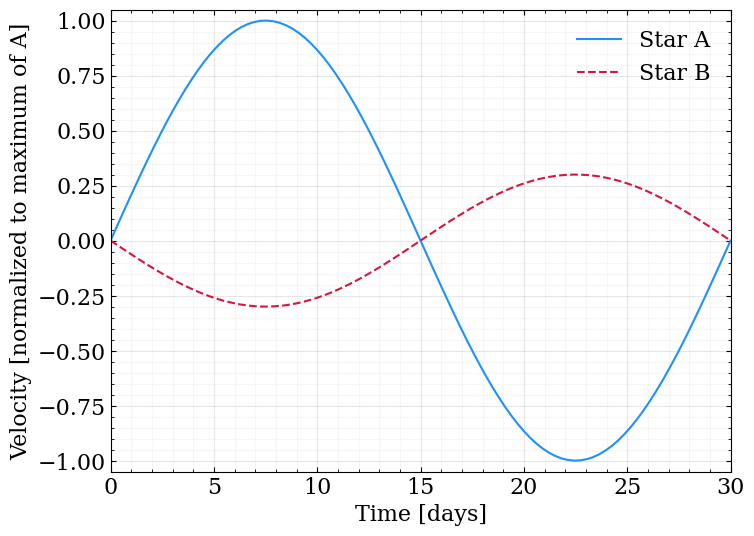

In [318]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colormaps

font = {'family' : 'DejaVu Serif',
    'weight' : 'normal',
    'size'   : 16}
plt.rc('font', **font) 

t = np.linspace(0,30,100)*units.day
P = 30*units.day
vA = np.sin(2*np.pi*units.rad/P*t)
vB = np.sin(2*np.pi*units.rad/P*t-np.pi*units.rad)*0.3
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(t.value,vA.value,c="dodgerblue",label="Star A")
ax.plot(t.value,vB.value,c="crimson",label="Star B",ls="--")
ax.set_xlabel("Time [days]"); ax.set_ylabel("Velocity [normalized to maximum of A]")
l = ax.legend(loc="upper right"); l.get_frame().set_edgecolor('none'); l.get_frame().set_facecolor('none')
ax.set_xlim(np.min(t.value),np.max(t.value))
ax.set_ylim(np.min(vA.value)*1.05,np.max(vA.value)*1.05)
ax.minorticks_on()
ax.grid(True,which='major',alpha=0.3)
ax.grid(True,which='minor',alpha=0.1)
ax.tick_params(axis='both',which='both',direction='in',top=True,right=True)

To find the mass, we know that we will need a period and a semi-major axis. From the plot above we can see that the period is 30 days (that's the time it takes for full "pattern" to complete). But what is the semimajor axis? 

Assuming circular orbits, each star will make a circle with circumference $vP$, thus each will be $\frac{vP}{2\pi}$ away from the center of mass. The semimajor axis of the system is then the sum of these distances for each star, i.e. 

$$a = \frac{P(v_A+v_B)}{2\pi}$$

But what are $v_A$ and $v_B$? We can read these from the plot as well! If we assume the star system is angled towards us at 90 degrees (i.e. looking edge on) then the maximum velocity occurs when all of the star's motion is away from us and the minimum velocity occurs when all of its motion is towards us. We know that the change in velocity is really due to where the star is in its orbit, and that if it's in a circular orbit it is really moving at this maximum speed the entire time (just usually not directly towards/away from us), so we just need to read the maximum value for both stars. Since the problem told us that the maximum value on the plot is 3 km/s we know this is where the blue star peaks, and the red star peaks around 0.3 time what the blue star does = 0.9 km/s (can read this in the code if you're clever). 

Thus the semimajor axis of the system is: 

$$a = \frac{30\textrm{ days }(3\textrm{ km/s} + 0.9\textrm{ km/s})}{2\pi} \approx \boxed{0.42\textrm{ AU}}$$

In [334]:
aA = np.max(vA)*100*units.km/units.s/(2*np.pi)*P
aB = np.max(vB)*100*units.km/units.s/(2*np.pi)*P
a = (aA+aB).to(units.AU)
a

<Quantity 0.35844159 AU>

From here, we can use Kepler's third law to compute the total mass of the system:

$$M_\rm{tot} = \frac{4\pi^2}{G}\left (\frac{a^3}{P^2}\right )\approx 11.3 M_\odot$$

In [335]:
Mtot = (4*(np.pi)**2/G*(a**3/P**2)).to(units.M_sun)
Mtot

<Quantity 6.82667998 solMass>

To get the masses of the individual stars, we know that the ratio of the velocities is proportional to the ratio of the masses, i.e. 

$$\frac{m_A}{m_B} = \frac{v_B}{v_A}\rightarrow \boxed{m_A = \frac{M_\rm{tot}}{\frac{v_A}{v_B}+1}}$$

(because $M_\rm{tot} = m_A + m_B \rightarrow m_B = M_\rm{tot} - m_A\rightarrow m_A = (M_\rm{tot}-m_A)\frac{v_B}{v_A}\rightarrow m_A(1+\frac{v_B}{v_A})=M_\rm{tot}\frac{v_B}{v_A}$)

The reverse is also true for $m_B$, or we can just subtract $m_A$ from the total mass. These numbers are calculated and displayed in the cells below:

In [336]:
mA = Mtot/(np.max(vA)/np.max(vB)+1)
mB = Mtot/(np.max(vB)/np.max(vA)+1)
mB+mA == Mtot

True

In [338]:
print("mass of star A = {:.2g}\nmass of star B = {:.2g}\ntotal mass = {:.2g}".format(mA,mB,Mtot))

mass of star A = 1.6 solMass
mass of star B = 5.3 solMass
total mass = 6.8 solMass


**Bonus:** visualizing the orbit to intuitively understand why $a = r_A + r_B$. 

If you do some clever algebra, you can actually express any two-body problem in terms of a much simpler single body problem, where the resulting system contains a single "reduced" mass orbiting the center of mass. You can read more about this process [here](https://farside.ph.utexas.edu/teaching/celestial/Celestialhtml/node11.html) (requires a bit of calculus) if you're curious, but the main takeaway is that this simpler system depends on the vector $\mathbf{r_A}-\mathbf{r_B}$, and since A and B are always on opposite sides of the center of mass and their distances are fixed if the orbits are circular, then $\mathbf{r_A}-\mathbf{r_B} = r_A - (-r_B) = r_A + r_B$ (since the center of mass defines 0 in this kind of system).

Formally, the new reduced system is given by: 

$$\mu \mathbf{a} = F_G = \frac{Gm_Am_B}{(r_A+r_B)^2}$$

Where $\mu = \frac{m_Am_B}{m_A+m_B}$ is the so-called "reduced mass" and $\mathbf{a} = \frac{\rm{d}^2\mathbf{x}}{\rm{d}t^2} = \ddot{\mathbf{x}}$ is the vector acceleration of the reduced mass. $F_G$ is the usual gravitational force between two bodies, which depends (like always) on the inverse of the distance between the two bodies, which is the same in either the original or reduced coordinate space. This is another way of seeing why $a = r_A+r_B$ &mdash; that is the distance between the two bodies which creates this gravitational force!  This is equivalent to saying the original system of two masses and two equations can be solved for by thinking about one of the bodies as not moving with the other spinning around it with a mass that is "reduced". For example, if we take star A to be the central star, we would try to solve for the acceleration of star B and cancel $m_B$ from both sides: 

$$\frac{m_Am_B}{m_A+m_B}\mathbf{a} = \frac{Gm_Am_B}{(r_A+r_B)^2} \rightarrow \frac{m_A}{m_A+m_B}\mathbf{a} = \frac{Gm_A}{(r_A+r_B)^2}$$

This should look familiar &mdash; i.e. usually if we considered how an object might move around the Sun we would have $\mathbf{a} = \frac{GM_\odot}{r^2}$, and indeed we can see that in the limit $m_A\gg m_B$ the result above does reduce to that. But our masses are similar in magnitude, and what this relationship tells us is basically that the acceleration in the non-inertial reference frame of pretending star A doesn't move at all means we have to artificially *reduce* the acceleration that star B feels as it orbits around star A, and the factor of that reduction $\frac{m_A}{m_A+m_B}$ is proportional to both their masses.

This may seem weird, but you can do further algebra to see what just the acceleration (and thus the orbital velocity and orbital period for a circular orbit) in this geometry reduces to exactly what we expect for the center of mass frame: 

$$|\mathbf{a}| = \frac{v^2}{(r_A+r_B)} = \frac{F_G}{\mu} = \frac{G(m_A+m_B)}{(r_A+r_B)^2}\rightarrow v = \sqrt{\frac{G(m_A+m_B)}{(r_A+r_B)}}\rightarrow P = \frac{2\pi(r_A+r_B)}{v} = 2\pi(r_A+r_B)\sqrt{\frac{(r_A+r_B)}{G(m_A+m_B)}}$$

You'll notice that in this "reduced mass" frame 

In [339]:
v_μ = np.sqrt(G*Mtot/(aA+aB))
v_μ.to(units.km/units.s)
P_μ = 2*np.pi*(aA+aB)*np.sqrt((aA+aB)/(G*(mA+mB)))
P_μ.to(units.day)

<Quantity 30. d>

Finally, let's visualize this to see what is happening. We'll take the circular case for simplicity: 

(<Figure size 1600x800 with 2 Axes>,
 array([<Axes: title={'center': 'Center of mass frame'}, xlabel='x [AU]', ylabel='y [AU]'>,
        <Axes: title={'center': 'Reduced mass ($μ$) frame'}, xlabel='x [AU]', ylabel='y [AU]'>],
       dtype=object))

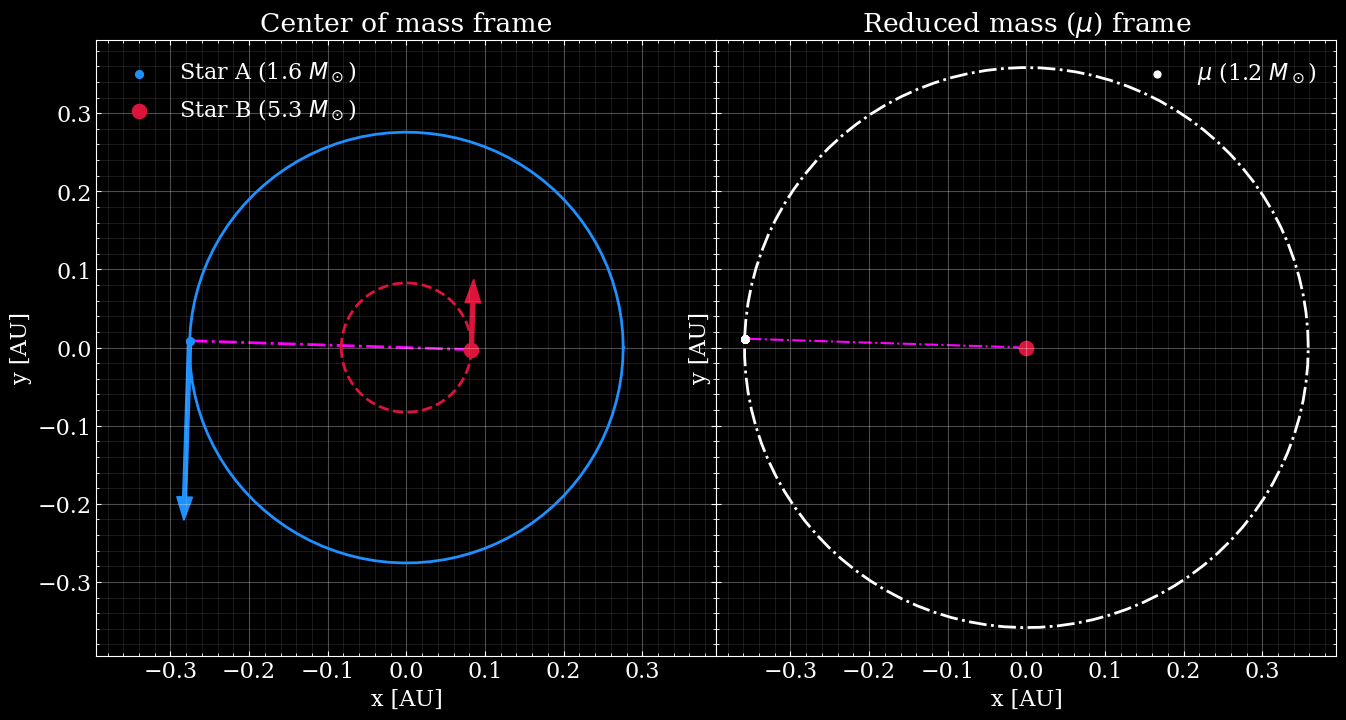

In [340]:
#visualizing orbit -- change θi to a number between 0 and 100 to see it "move"
def frame(θi):
    fig,ax = plt.subplots(1,2,figsize=(16,8),gridspec_kw={'wspace':0.0},sharey=True,sharex=True,facecolor="black")
    θ = np.linspace(0,2*np.pi,100)*units.rad
    xA = aA*np.cos(θ); yA = aA*np.sin(θ)
    xB = aB*np.cos(θ-np.pi*units.rad); yB = aB*np.sin(θ-np.pi*units.rad)
    xA = xA.to(units.AU).value; yA = yA.to(units.AU).value
    xB = xB.to(units.AU).value; yB = yB.to(units.AU).value

    ax[0].plot(xA,yA,color="dodgerblue",lw=2)
    ax[0].plot(xB,yB,color="crimson",ls="--",lw=2)
    ax[0].set_facecolor('k')

    rA = np.sqrt(xA**2+yA**2); rB = np.sqrt(xB**2+yB**2)
    r = rB+rA #distance between A and B at any angle
    ax[0].plot([xA[θi],xB[θi]],[yA[θi],yB[θi]],color="magenta",ls="-.",lw=2,zorder=0)
    μ = mA*mB/(Mtot)
    ax[1].plot(r*np.cos(θ),r*np.sin(θ),c="white",lw=2,ls="-.")
    ax[1].scatter(r*np.cos(θ[θi]),r*np.sin(θ[θi]),c="white",s=μ.value*20,label="$\mu$ ({:.2g} $M_\odot$)".format(μ.value))
    ax[1].plot([0,r[θi]*np.cos(θ[θi])],[0,r[θi]*np.sin(θ[θi])],color="magenta",ls="-.",zorder=0)
    ax[1].set_facecolor('k')
    ax[1].scatter([0],[0],color="crimson",s=mB.value*20)

    sA=ax[0].scatter(xA[θi],yA[θi],color="dodgerblue",label=r"Star A ({:.2g} $M_\odot$)".format(mA.value),s=mA.value*20)
    sB=ax[0].scatter(xB[θi],yB[θi],color="crimson",label="Star B ({:.2g} $M_\odot$)".format(mB.value),s=mB.value*20)
    sA_arrow=ax[0].arrow(xA[θi],yA[θi],np.max(vA)*np.cos(θ[θi].value+np.pi/2)/5,np.max(vA)*np.sin(θ[θi].value+np.pi/2)/5,color="dodgerblue",head_width=0.02,width=0.005)
    sB_arrow=ax[0].arrow(xB[θi],yB[θi],np.max(vB)*np.cos(θ[θi].value-np.pi/2)/5,np.max(vB)*np.sin(θ[θi].value-np.pi/2)/5,color="crimson",head_width=0.02,width=0.005)

    for i in range(2):
        ax[i].minorticks_on()
        ax[i].grid(True,which='major',alpha=0.3,color="white")
        ax[i].grid(True,which='minor',alpha=0.1,color="white")
        ax[i].tick_params(axis='both',which='both',direction='in',top=True,right=True,color="white",labelcolor="white")
        for spine in ax[i].spines.values():
            spine.set_edgecolor('white')
        l = ax[i].legend(facecolor='none',labelcolor="white",loc="upper left" if i==0 else "upper right")
        l.get_frame().set_edgecolor('none')
        ax[i].set_xlabel("x [AU]",color="white")
        ax[i].set_ylabel("y [AU]",color="white")
    ax[0].set_title("Center of mass frame",color="white")
    ax[1].set_title(r"Reduced mass ($μ$) frame",color="white")
    return fig,ax

#change this number 
θi = 49
frame(θi)

In [341]:
#make animation of binary orbit (just for fun, may not work on your computer...)
import subprocess as sp
import sys
for θi in range(len(θ)):
    fig,ax = frame(θi)
    fig.savefig("frame_{:03d}.png".format(θi))
    plt.close('all')
    sys.stdout.write("{:02d}% complete".format(int(θi/len(θ)*100)))
    sys.stdout.write("\r")
    sys.stdout.flush()
sp.run(["ffmpeg -framerate 30 -i frame_%03d.png -y -vcodec libx264 -pix_fmt yuv420p circular_orbit.mp4"],
       stdout=sp.DEVNULL,stderr=sp.DEVNULL,shell=True)
sp.run(["rm frame_*.png"],shell=True)

CompletedProcess(args=['rm frame_*.png'], returncode=0)

This will make a video called `circular_orbit.mp4` (if it works -- you may not have everything installed you need for it to work right off the bat) in the directory where this notebook is saved with an animation of the plot with the stars moving.